## Pandas

 테이블 형태의 데이터를 쉽게 다루도록 도와주는 pandas 라이브러리

 - series 1차원 배열 형태의 데이터 구조
 - DataFrame 2차원 배열 형태의 데이터 구조



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

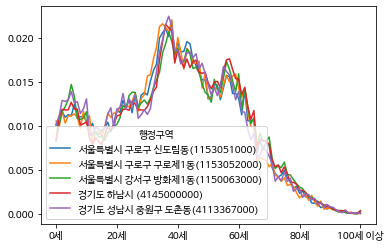

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family = 'NanumBarunGothic')

df = pd.read_csv('/content/drive/My Drive/age.csv',encoding = 'cp949', index_col = 0)
df = df.div(df['총인구수'], axis = 0) # axis = 0 행으로 처리

df = df.div(df['총인구수'], axis = 0)     # ①-1. 전체 데이터를 총인구수로 나눠서 비율로 변환
del df['총인구수'], df['연령구간인구수']  # ①-2. 총인구수, 연령구간인구수 열 삭제
name = "신도림"  # ② 지역 이름 입력
a = df.index.str.contains(name)  # ③ 해당 행을 찾아서 해당 지역의 인구 구조를 저장
df2 = df[a]
df.loc[np.power(df.sub(df2.iloc[0], axis = 1), 2).sum(axis = 1).sort_values().index[:5]].T.plot()
plt.show()



## 데이터 수집 

In [8]:
# 네이버 뉴스 크롤링 - API 이용

import os
import sys
import urllib.request

client_id = "I4MSX99tQylrXhjzrpL4"
client_secret = ""

encText = urllib.parse.quote("오렌지") # parse 구문분석 라이브러리
url = "https://openapi.naver.com/v1/search/news?query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Sun, 22 May 2022 20:04:13 +0900",
	"total":413646,
	"start":1,
	"display":10,
	"items":[
		{
			"title":"[뉴요커의 아트레터] 뉴욕 프리즈 개막…다음은 서울 프리즈",
			"originallink":"https:\/\/www.sedaily.com\/NewsView\/2662JIXOJR",
			"link":"https:\/\/news.naver.com\/main\/read.naver?mode=LSD&mid=sec&sid1=103&oid=011&aid=0004056656",
			"description":"세계 4대 메이저 갤러리라 불리는 페이스(Pace)는 모로코 태생의 라티파 에샤크(Latifa Echakhch)의 회화들을, 데이비드 즈워너(David Zwirner) 갤러리는 케롤 보브(Carol Bove)의 <b>오렌지<\/b> 조각들을, 하우저 앤 워스(Hauser &amp; Wirth)... ",
			"pubDate":"Sun, 22 May 2022 19:39:00 +0900"
		},
		{
			"title":"시장 상인도 손님도 “치솟는 물가 이렇게 무섭기는 처음”",
			"originallink":"http:\/\/www.segye.com\/content\/html\/2022\/05\/22\/20220522512421.html?OutUrl=naver",
			"link":"https:\/\/news.naver.com\/main\/read.naver?mode=LSD&mid=sec&sid1=101&oid=022&aid=0003698056",
			"description":"78·<b>오렌지<\/b> 25% ↑ 지난 20일 서울 서초구 농협하나로마트 양재점에서 시민들이 물품을 구매하고 있다.... 연합뉴스 한 대형마트에서는 지난해 5월 19일 7980원이었던 미국산 <b>오렌지<\/b> 1봉(2.1㎏ 안팎)이 이달 19일에는...

In [19]:

import os
import sys
import urllib.request
import datetime
import json
import time

client_id = "I4MSX99tQylrXhjzrpL4"
client_secret = ""

def getRequestUrl(url):
  req = urllib.request.Request(url)
  req.add_header('X-Naver-Client-Id',client_id )
  req.add_header('X-Naver-Client-Secret', client_secret)

  try: 
    response = urllib.request.urlopen(req)
    if response.getcode() == 200:
      print('[%s] Url Request Success' % datetime.datetime.now())
      return response.read().decode('utf-8')
  except Exception as e:
    print(e)
    print('[%s] Error for URL : %s' %(datetime.datetime.now(), url))
    return None

def getNaverSearch(node, srcText, page_start, display):
  base = 'https://openapi.naver.com/v1/search'
  node = '/%s.json' % node
  parameters = '?query=%s&start=%s&display=%s' %(urllib.parse.quote(srcText), page_start, display)

  url = base + node + parameters
  responseDecode = getRequestUrl(url)

  if (responseDecode == None):
    return None
  else:
    return json.loads(responseDecode)

def getPostData(post, jsonResult, cnt):
  title = post['title']
  description = post['description']
  org_link = post['originallink']
  link = post['link']

  pDate = datetime.datetime.strptime(post['pubDate'], '%a, %d %b %Y %H:%M:%S +0900')
  pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')

  jsonResult.append({'cnt':cnt, 'title':title, 'description': description,
                                'org_link':org_link, 'link': org_link, 'pDate':pDate})
  return

def main():
  node = 'news'
  srcText = input('검색어를 입력하세요 ')
  cnt = 0
  jsonResult = []

  jsonResponse = getNaverSearch(node,srcText,1,100)
  total = jsonResponse['total']

  while((jsonResponse != None) and (jsonResponse['display'] != 0)):
    for post in jsonResponse['items']:
      cnt += 1
      getPostData(post, jsonResult,cnt)

    start = jsonResponse['start'] + jsonResponse['display']
    jsonResponse = getNaverSearch(node, srcText, start, 100)

  print('전체 검색 : %d 건' % total)

  with open('%s_naver_%s.json'%(srcText, node), 'w', encoding = 'utf-8') as outfile :
    jsonFile = json.dumps(jsonResult, indent = 4, sort_keys = True, ensure_ascii = False)

  print('가져온 데이터 : %d 건' %(cnt))
  print('%s_naver_%s.json SAVED' % (srcText, node))

if __name__ == '__main__':
  main()

검색어를 입력하세요 딸기
[2022-05-22 12:32:40.142534] Url Request Success
[2022-05-22 12:32:41.118009] Url Request Success
[2022-05-22 12:32:42.122238] Url Request Success
[2022-05-22 12:32:43.059865] Url Request Success
[2022-05-22 12:32:44.050870] Url Request Success
[2022-05-22 12:32:45.051678] Url Request Success
[2022-05-22 12:32:46.038837] Url Request Success
[2022-05-22 12:32:47.002481] Url Request Success
[2022-05-22 12:32:47.993487] Url Request Success
[2022-05-22 12:32:48.955774] Url Request Success
HTTP Error 400: Bad Request
[2022-05-22 12:32:49.676573] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EB%94%B8%EA%B8%B0&start=1001&display=100
전체 검색 : 270912 건
가져온 데이터 : 1000 건
딸기_naver_news.json SAVED
